In [1]:
import pandas as pd
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import warnings
import seaborn as sn
warnings.filterwarnings("ignore")

In [2]:
# Define a function to replace outliers with NaN
def replace_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series.where((series >= lower_bound) & (series <= upper_bound), np.nan)


# List of stenon columns
stenon_cols = ['Stenon P', 'Stenon K', 'Stenon Mg', 'Stenon SOC', 'Stenon pH', 'Stenon MC', 'Stenon Texture','Stenon Nmin']
stenon_label = ['P','K','Mg','SOC','pH','MC','Texture']
soil_scanning_label = ['P','K','Mg','TOC','pH','MC','Clay']
stenon_cols_no_Texture = ['Stenon P', 'Stenon K', 'Stenon Mg', 'Stenon SOC', 'Stenon pH', 'Stenon MC','Stenon Nmin']
soil_scanning_cols = ['SS P','SS K','SS Mg','SS TOC','SS pH','SS MC','SS Clay']
all_cols = ['Stenon P','Stenon K','Stenon Mg','Stenon SOC','Stenon pH','Stenon MC','Stenon Texture','Stenon Nmin','SS P','SS K','SS Mg','SS TOC','SS pH','SS MC','SS Clay']



In [3]:
# Correlate Stenon-Z vs Soil Scanning-Z
#gdf: Stenon_Nmin,Stenon_P,Stenon_K,Stenon_Mg,Stenon_SOC,Stenon_pH,Stenon_MC,Stenon_Texture,SS_P,SS_K,SS_Mg,SS_TOC,SS_pH,SS_MC,SS_Clay

gdf = gpd.read_file('Stenon_z_sampled_Soil_Scanning_z.geojson')
old_crs = gdf.crs.to_epsg()
gdf = gdf.to_crs(5650)
new_crs = gdf.crs.to_epsg()
print("Transform crs of Stenon_sampled_Soil_Scanning.geojson from",old_crs,"to",new_crs)

gdf.head()

Transform crs of Stenon_sampled_Soil_Scanning.geojson from 5650 to 5650


,Stenon Nmin,Stenon P,Stenon K,Stenon Mg,Stenon SOC,Stenon pH,Stenon MC,Stenon Texture,SS P,SS K,SS Mg,SS Ca,SS TOC,SS pH,SS CEC,SS MC,SS Clay,geometry
0,1.81,2.02,-0.06,1.06,1.24,0.54,-0.13,2,-0.23,0.03,0.38,0.48,0.35,0.43,0.47,-0.03,0.75,POINT (33307686.021 5972779.024)
1,-0.53,0.34,-0.35,0.56,-0.43,-0.16,0.42,2,-0.76,-0.26,-1.20,-0.17,0.15,-0.14,-0.19,-0.39,0.63,POINT (33307718.586 5972735.425)
2,-0.70,-1.55,0.59,0.27,0.41,0.54,0.88,2,-0.88,-0.05,-1.25,-0.35,0.15,-0.15,-0.36,-0.31,0.64,POINT (33307754.574 5972698.659)
3,0.14,2.36,1.67,0.84,1.24,1.23,-0.03,2,-1.01,0.11,-0.90,-0.27,0.15,-0.03,-0.28,-0.04,0.83,POINT (33307792.524 5972667.003)
4,-0.28,0.57,-0.85,0.41,-0.43,-0.86,-0.13,2,-0.43,-0.34,-1.40,-0.13,0.67,-0.39,-0.14,-0.61,0.34,POINT (33307822.671 5972624.140)


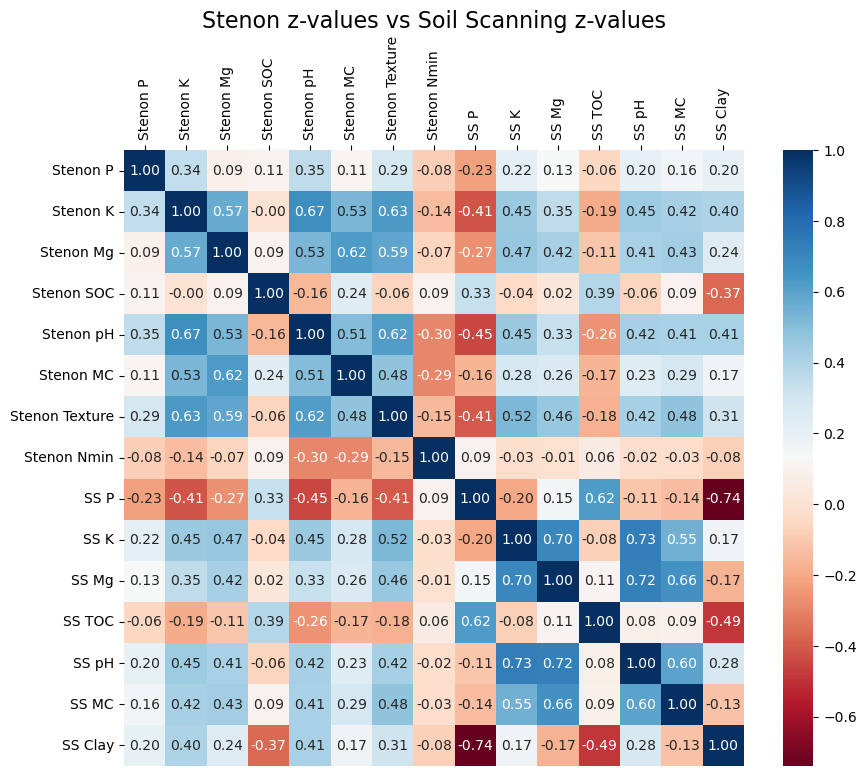

In [4]:
plt.rcParams["figure.figsize"] = (10,(8))

corr_matrix = gdf[all_cols].corr()
ax = sn.heatmap(corr_matrix, annot=True, cmap="RdBu", fmt=".2f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Stenon z-values vs Soil Scanning z-values', size=16)

plt.savefig('corr_matrix_Stenon_Z_Points_to_soil_scanning_Z_IDW.png', bbox_inches='tight', dpi=400)


In [5]:
# Correlate Stenon vs Soil Scanning-z
#gdf: Stenon_Nmin,Stenon_P,Stenon_K,Stenon_Mg,Stenon_SOC,Stenon_pH,Stenon_MC,Stenon_Texture,SS_P,SS_K,SS_Mg,SS_TOC,SS_pH,SS_MC,SS_Clay

gdf = gpd.read_file('Stenon_sampled_Soil_Scanning_z.geojson')
old_crs = gdf.crs.to_epsg()
gdf = gdf.to_crs(5650)
new_crs = gdf.crs.to_epsg()
print("Transform crs of Stenon_sampled_Soil_Scanning.geojson from",old_crs,"to",new_crs)

gdf.head()

Transform crs of Stenon_sampled_Soil_Scanning.geojson from 5650 to 5650


,Stenon Nmin,Stenon P,Stenon K,Stenon Mg,Stenon SOC,Stenon pH,Stenon MC,Stenon Texture,SS P,SS K,SS Mg,SS TOC,SS pH,SS MC,SS Clay,SS CEC,SS Ca,date,geometry
0,83,9.4,10.1,8.1,1.1,6.5,11.1,2,-0.23,0.03,0.38,0.35,0.43,-0.03,0.75,0.47,0.48,2022-11-09,POINT (33307686.021 5972779.024)
1,55,7.9,9.7,7.4,0.9,6.4,11.7,2,-0.76,-0.26,-1.20,0.15,-0.14,-0.39,0.63,-0.19,-0.17,2022-11-09,POINT (33307718.586 5972735.425)
2,53,6.2,11.0,7.0,1.0,6.5,12.2,2,-0.88,-0.05,-1.25,0.15,-0.15,-0.31,0.64,-0.36,-0.35,2022-11-09,POINT (33307754.574 5972698.659)
3,63,9.7,12.5,7.8,1.1,6.6,11.2,2,-1.01,0.11,-0.90,0.15,-0.03,-0.04,0.83,-0.28,-0.27,2022-11-09,POINT (33307792.524 5972667.003)
4,58,8.1,9.0,7.2,0.9,6.3,11.1,2,-0.43,-0.34,-1.40,0.67,-0.39,-0.61,0.34,-0.14,-0.13,2022-11-09,POINT (33307822.671 5972624.140)


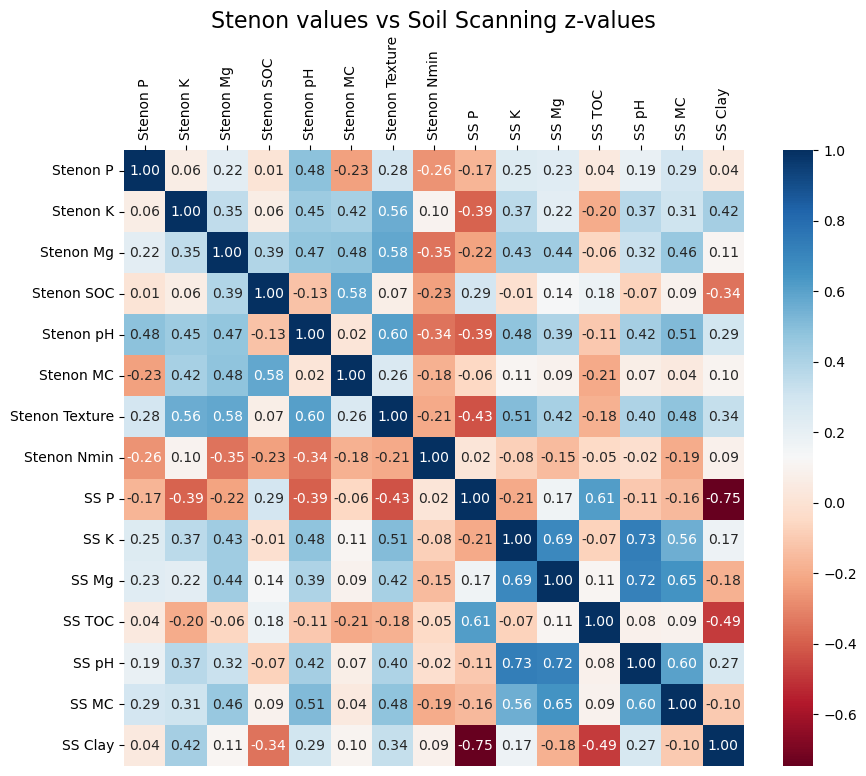

In [6]:
plt.rcParams["figure.figsize"] = (10,(8))

corr_matrix = gdf[all_cols].corr()
ax = sn.heatmap(corr_matrix, annot=True, cmap="RdBu", fmt=".2f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Stenon values vs Soil Scanning z-values', size=16)

plt.savefig('corr_matrix_Stenon_Points_to_soil_scanning_Z_IDW.png', bbox_inches='tight', dpi=400)

In [7]:

dates = ['2022-11-09', '2022-12-09', '2023-01-21', '2023-02-15','2023-03-03', '2023-04-15', '2023-07-13', '2023-08-04','2023-08-31']
row = [0,0,0,1,1,1,2,2,2]
col = [0,1,2,0,1,2,0,1,2]

# Create empte dataframe with this column headers
single_dates_df = pd.DataFrame([], columns=['P/P','K/K','Mg/Mg','TOC/SOC','pH/pH','MC/MC','Clay/Texture'])

#stenon_corr = gdf.loc[gdf['date'] == '2022-11-09']
for i, date in enumerate(dates):
    stenon_corr = gdf.loc[gdf['date'] == date]
    # Replace Stenon outliers with the replace_outliers function
    stenon_corr[stenon_cols_no_Texture] = stenon_corr[stenon_cols_no_Texture].apply(replace_outliers, axis=0)
    #print("number of outliers removed:\n", stenon_corr[stenon_cols].isna().sum())

    # Perform the correlation
    corr_matrix = stenon_corr[all_cols].corr()
    corr_matrix = corr_matrix.round(2)
    corr_matrix.drop(columns=stenon_cols, inplace=True)  # drop stenon columns
    corr_matrix.drop(index=soil_scanning_cols, inplace=True)    # drop soil scanning rows
    corr_matrix.drop(index="Stenon Nmin", inplace=True)    # drop Nmin row
    #print(corr_matrix)

    # Extract the diagonal elements and convert them to a list
    diagonal_elements = np.diag(corr_matrix.values)
    diagonal_list = diagonal_elements.tolist()

    # Create a new DataFrame with a single row from the diagonal_list
    new_row = pd.DataFrame([diagonal_list], columns=single_dates_df.columns)
    new_row.index = [date]  #assign the row-index
 
    #single_dates_df.loc[len(single_dates_df)] = diagonal_list #append the diagonal list
    single_dates_df = pd.concat([single_dates_df,new_row])

#print(single_dates_df)

col_sums = single_dates_df.mean(axis=0)
new_row = pd.DataFrame([col_sums], columns=single_dates_df.columns, index=['Mean Corr'])
#new_row.index = "Total"  #assign the row-index

single_dates_df_mean = pd.concat([single_dates_df,new_row])

single_dates_df.round(2)
single_dates_df_mean.round(2)

# Specify the file path for the Excel file
excel_file_path = 'single_date_correlations.xlsx'

# Export the DataFrame to Excel
single_dates_df_mean.to_excel(excel_file_path, index=True)
print(f"DataFrame exported to {excel_file_path}")
single_dates_df_mean

DataFrame exported to single_date_correlations.xlsx


,P/P,K/K,Mg/Mg,TOC/SOC,pH/pH,MC/MC,Clay/Texture
2022-11-09,0.000000,0.060000,-0.020000,-0.090000,0.720000,0.040000,0.510000
2022-12-09,-0.400000,0.310000,0.200000,0.060000,0.210000,0.460000,0.510000
2023-01-21,-0.120000,0.100000,0.420000,0.210000,0.100000,0.320000,0.060000
2023-02-15,-0.180000,0.090000,0.220000,0.170000,0.300000,0.340000,0.500000
2023-03-03,-0.320000,0.630000,0.410000,0.500000,0.570000,0.560000,0.400000
2023-04-15,-0.420000,0.500000,0.530000,0.550000,0.410000,0.400000,0.380000
2023-07-13,-0.020000,0.420000,0.500000,-0.030000,0.390000,0.330000,0.610000
2023-08-04,-0.540000,0.580000,0.410000,0.640000,0.430000,-0.190000,0.380000
2023-08-31,0.230000,0.510000,0.410000,0.210000,0.250000,0.550000,0.410000
Mean Corr,-0.196667,0.355556,0.342222,0.246667,0.375556,0.312222,0.417778


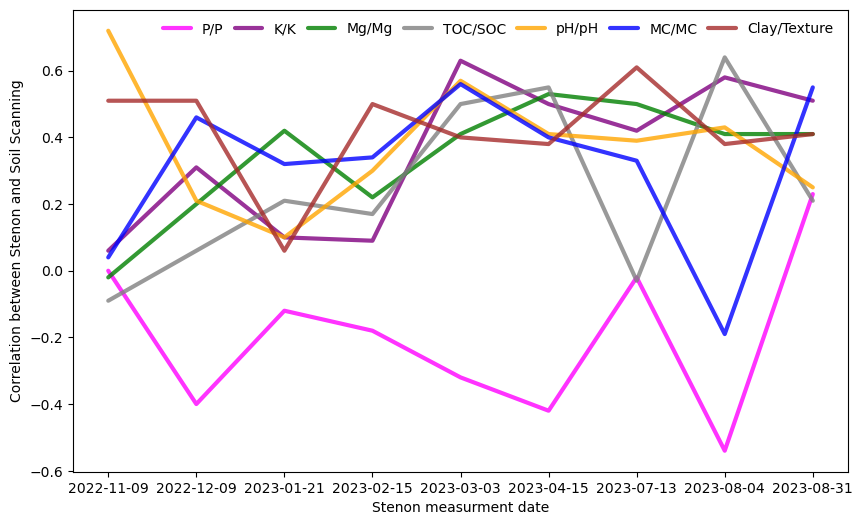

In [63]:
df = single_dates_df
# Plot the data

fig, ax = plt.subplots(figsize=(10, 6))
#colors = ['magenta','purple','green','grey','orange','blue','brown']
colors = ['#FF00FF', '#800080', '#008000', '#808080', '#FFA500', '#0000FF', '#A52A2A']
for i,column in enumerate(df.columns):
    plt.plot(df.index, df[column], label=column, color=colors[i], linewidth=3, alpha=0.8, solid_capstyle='round')

plt.xlabel('Stenon measurment date')
plt.ylabel('Correlation between Stenon and Soil Scanning')
plt.legend(loc='upper left',bbox_to_anchor=(0.1, 1), ncol=len(df.columns), frameon=False, columnspacing=0.8)

#ax.set_xticklabels(df.index, rotation=20, ha='left')
plt.savefig('plots/corr_lineplot_stenon_vs_soil_scanning.png', bbox_inches='tight', dpi=400)
plt.show()

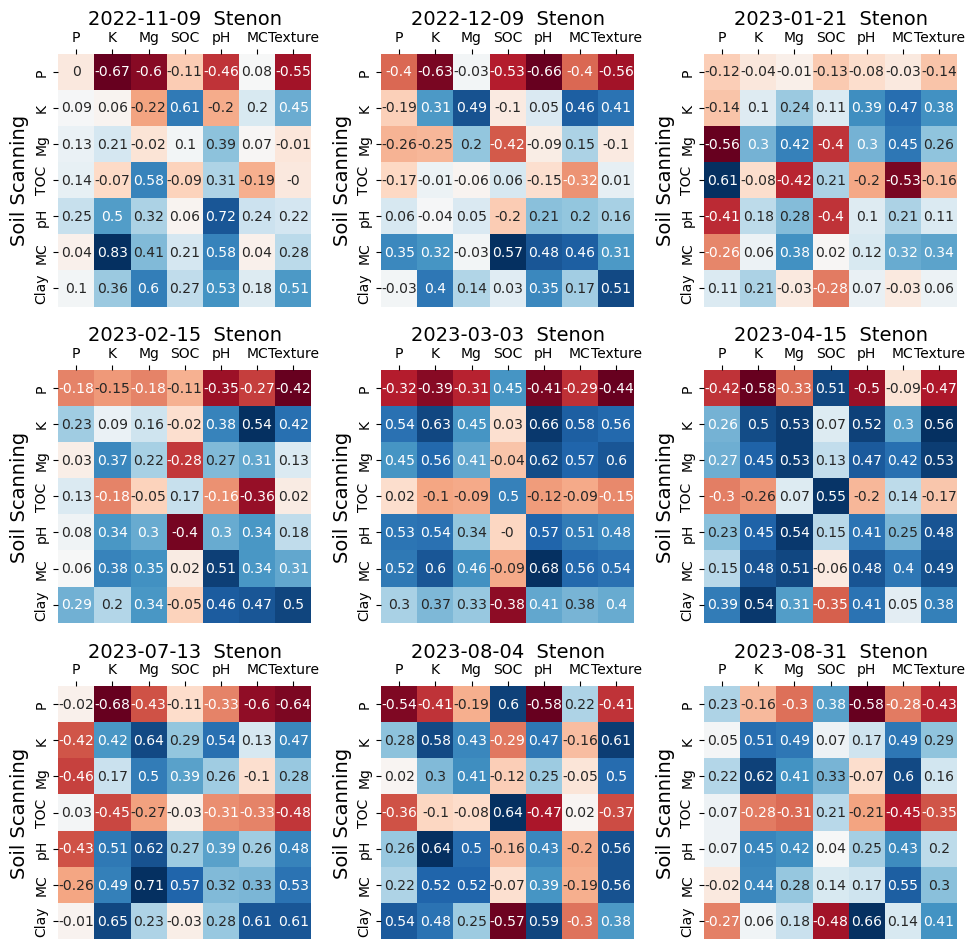

In [107]:

dates = ['2022-11-09', '2022-12-09', '2023-01-21', '2023-02-15','2023-03-03', '2023-04-15', '2023-07-13', '2023-08-04','2023-08-31']
row = [0,0,0,1,1,1,2,2,2]
col = [0,1,2,0,1,2,0,1,2]

#fig, ax = plt.subplots(nrows=1, ncols=len(dates), figsize=(5*len(dates), 4.5))
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12.5, 11.5))

for i, date in enumerate(dates):
    #print(date)
    stenon_corr = gdf.loc[gdf['date'] == date]
    #plt.rcParams["figure.figsize"] = (3.6,4.3)  #(x,y)

    # Replace Stenon outliers with the replace_outliers function
    stenon_corr[stenon_cols_no_Texture] = stenon_corr[stenon_cols_no_Texture].apply(replace_outliers, axis=0)
    #print("number of outliers removed:\n", stenon_corr[stenon_cols].isna().sum())

    corr_matrix = stenon_corr[all_cols].corr()
    corr_matrix = corr_matrix.round(2)
    corr_matrix.drop(index=stenon_cols, inplace=True)  # drop stenon columns
    corr_matrix.drop(columns=soil_scanning_cols, inplace=True)    # drop soil scanning rows
    corr_matrix.drop(columns="Stenon Nmin", inplace=True)    # drop Nmin row
    #print(corr_matrix)


    sn.heatmap(corr_matrix, annot=True, cmap="RdBu", cbar=False, square=True,  xticklabels=stenon_label, yticklabels=soil_scanning_label, ax=ax[row[i],col[i]])
    ax[row[i],col[i]].set_xlabel(date + "  Stenon", fontsize=14)
    ax[row[i],col[i]].set_ylabel("Soil Scanning", fontsize=14)
    ax[row[i],col[i]].xaxis.set_label_position('top')
    ax[row[i],col[i]].xaxis.tick_top()
    #ax[row[i],col[i]].text(-2.25 ,-0.25, date, fontsize=12, bbox={'facecolor':'white'})


    #plt.savefig('plots/corr_matrix_stenon_'+date+'_vs_soil_scanning.png', bbox_inches='tight', dpi=400)

fig.subplots_adjust(wspace=0, hspace=0.25)
#plt.tight_layout()

plt.savefig('plots/corr_matrix_stenon_vs_soil_scanning_single_dates.png', bbox_inches='tight', dpi=400)
plt.show()